## Clustering 

In [5]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift, DBSCAN 
from sklearn.model_selection import train_test_split

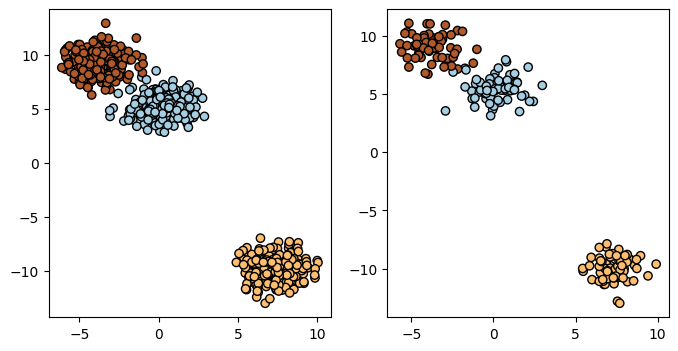

In [22]:
X, y = make_blobs(n_samples = 1000, n_features = 2, random_state=14) #, centers = clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

_, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train, edgecolor = 'k', cmap = 'Paired')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolor = 'k', cmap = 'Paired')

plt.show() 

In [ ]:
# import decision boundaries function


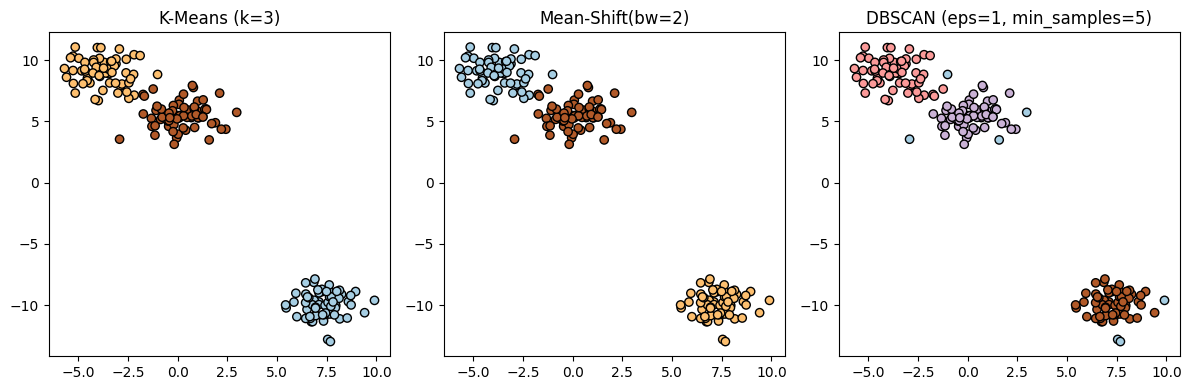

In [27]:
models = [ KMeans(n_clusters= 3) , 
         MeanShift(bandwidth= 2) , 
         DBSCAN(eps= 1,min_samples= 5)]

model_names = ['K-Means (k=3)', 'Mean-Shift(bw=2)', 'DBSCAN (eps=1, min_samples=5)']

_, axes = plt.subplots(1, len(model_names), figsize = (4*len(model_names), 4))
predictions = {}

# fit the model
for model, model_name, ax in zip(models, model_names, axes):
    # Instance and train
    model.fit(X_train)

    # Predictions on train and test sets
    if model_name == 'DBSCAN (eps=1, min_samples=5)':
        predictions[model_name] = model.fit_predict(X_test)
        
    else:
     predictions [model_name] = model.predict(X_test) 
    

    # Plot everything 
    ax.scatter(X_test[:, 0], X_test[:, 1], c = predictions[model_name], edgecolor = 'k', cmap = 'Paired')
    ax.set_title(model_name)
    
plt.tight_layout()    
plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [23]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

In [24]:
## Scores for training data

for model_name in model_names :
  print ("########----- Results for {0} -----########".format( model_name ))
  ari = adjusted_rand_score( y_test , predictions[model_name] )
  ami = adjusted_mutual_info_score( y_test , predictions[model_name] )
  sil = silhouette_score( X_test , predictions[model_name], metric='euclidean' )
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for K-Means (k=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.678  	   0.782  	   0.390  	
########----- Results for Mean-Shift(bw=2) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.971  	   0.952  	   0.731  	
########----- Results for DBSCAN (eps=2, min_samples=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.579  	   0.736  	   0.843  	


In [ ]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(data[:, 0], data[:, 2], c = predictions, edgecolor = 'k', cmap = 'Paired')
ax[1].scatter(data[:, 0], data[:, 6], c = predictions, edgecolor = 'k', cmap = 'Paired')
ax[2].scatter(data[:, 2], data[:, 6], c = predictions, edgecolor = 'k', cmap = 'Paired')